## Atmospheric River Detection QC  
  
>This notebook performs some basic QC tasks on the AR detection outputs. Select AR event attributes are examined through time, and AR event attribute min/mean/max values, distributions, and pairwise relationships are also explored.  
>**Note:** In this notebook the term "AR event" refers only to landfalling AR multipolygons aggregated over adjacent timesteps.  

>Run this notebook after executing the `download.py`  ->  `compute_ivt.py`  ->  `ar_detection.py` pipeline as described in the [repo](https://github.com/ua-snap/ar_avalanche) `README.md`

#### Setup:

In [1]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

from config import shp_fp, csv_fp, ak_shp, landfall_shp, landfall_csv, landfall_events_shp, landfall_events_csv

In [2]:
#import raw AR shapefile/csv and convert time to datetime
raw = gpd.read_file(shp_fp)
raw['time'] = pd.to_datetime(raw['time'])
raw_ = pd.read_csv(csv_fp)

#read AR landfall shapefile/csv and convert time to datetime
landfall = gpd.read_file(landfall_shp)
landfall['time'] = pd.to_datetime(landfall['time'])
landfall_ = pd.read_csv(landfall_csv)

#read AR events shapefile/csv and convert start/end to datetime
events = gpd.read_file(landfall_events_shp)
events['start'] = pd.to_datetime(events['start'])
events['end'] = pd.to_datetime(events['end'])
events_ = pd.read_csv(landfall_events_csv)

#### Check attributes:    

View column description CSV for each output dataset, and check that the columns in the shapefile output and CSV output are identical.

In [3]:
#helper function to view & check attributes
def attr_check(shp, tbl):
    pd.set_option('display.max_colwidth', None)
    display(tbl)
    pd.set_option('display.max_colwidth', 150)


    missing = []
    for a in shp.columns.values.tolist():
        if a not in tbl.shp_col.values.tolist():
            missing.append(a)
    
    if len(missing) == 0:
        print("Columns in shapefile and table are identical.")
    else:
        print("There are some missing columns:")
        print(missing)

In [4]:
attr_check(raw, raw_)

,shp_col,desc
0,time,timestep of AR
1,label,original candidate region label of timestep AR
2,geometry,geometry string for AR polygon
3,ratio,length to width ratio of timestep AR
4,length,length (km) of timestep AR
5,orient,orientation of timestep AR
6,poleward,poleward strength of timestep AR
7,dir_coher,directional coherence (%) of timestep AR
8,mean_dir,mean IVT direction of timestep AR
9,tot_str,sum of IVT within timestep AR


Columns in shapefile and table are identical.


In [5]:
attr_check(landfall, landfall_)

,shp_col,desc
0,time,timestep of AR
1,label,original candidate region label of timestep AR
2,geometry,geometry string for AR polygon
3,ratio,length to width ratio of timestep AR
4,length,length (km) of timestep AR
5,orient,orientation of timestep AR
6,poleward,poleward strength of timestep AR
7,dir_coher,directional coherence (%) of timestep AR
8,mean_dir,mean IVT direction of timestep AR
9,tot_str,sum of IVT within timestep AR


Columns in shapefile and table are identical.


In [7]:
attr_check(events, events_)

,shp_col,desc
0,event_id,first timestep of AR event
1,geometry,last timestep of AR event
2,start,sum of IVT across all timestep ARs in event
3,end,sum of relative IVT (sum IVT/area) across all timestep ARs in event
4,sumtot_str,mean length to width ratio across all timestep ARs in event
5,sumrel_str,mean length (km) across all timestep ARs in event
6,ratio_m,mean orientation across all timestep ARs in event
7,len_km_m,mean poleward strength across all timestep ARs in event
8,orient_m,mean directional coherence (%) across all timestep ARs in event
9,poleward_m,mean IVT direction across all timestep ARs in event


There are some missing columns:
['index', 'rintensity']


#### Counts and Ranges:

View counts of AR detection outputs, and attribute ranges of AR events.

In [7]:
print("There were " + str(len(raw)) + " individual timestep ARs detected across the entire spatial and temporal domain.")
print("Of these, " + str(len(landfall)) + " ARs detected intersected the Alaska polygon boundary.")
print("Of these, " + str(len(events)) + " possible AR events were aggregated using adjacent timesteps and overlapping geometry.")
print("\n")
print("On average, we detected " + str(len(events)/30) + " possible AR events per year.")

There were 19146 individual timestep ARs detected across the entire spatial and temporal domain.
Of these, 8293 ARs detected intersected the Alaska polygon boundary.
Of these, 1802 possible AR events were aggregated using adjacent timesteps and overlapping geometry.


On average, we detected 60.06666666666667 possible AR events per year.


In [8]:
gdf = events

[]

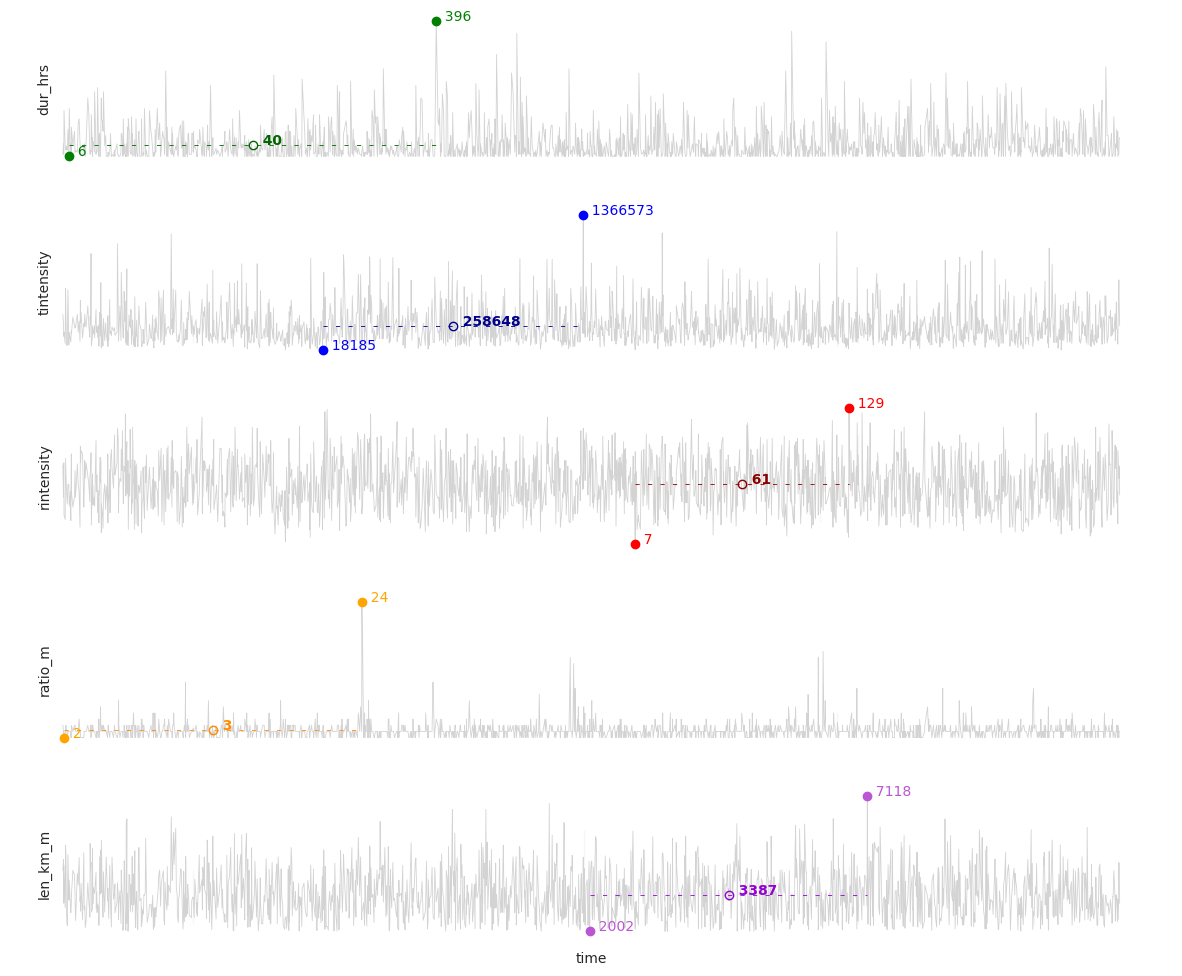

In [66]:
sub = gdf[['start', 'dur_hrs', 'tintensity', 'rintensity', 'ratio_m', 'len_km_m']]

fig, axes = plt.subplots(len(sub.drop(columns='start').columns), 1, sharex=True, figsize=(15, 12))
plt.subplots_adjust(hspace = 0.3)
sns.set_style("white")
sns.despine(fig=fig, ax=axes, top=True, right=True, left=True, bottom=True, offset=None, trim=False)

cpairs = [['green', 'darkgreen'], ['blue', 'darkblue'], ['red', 'darkred'], ['orange', 'darkorange'], ['mediumorchid', 'darkviolet']]

for attr, ax, c in zip(sub.drop(columns='start').columns.values.tolist(), range(len(axes)), cpairs):
    a_min, a_mean, a_max = sub[attr].values.min(), sub[attr].values.mean(), sub[attr].values.max()
    a_min_idx, a_max_idx = sub[attr].idxmin(), sub[attr].idxmax()
    min_t, max_t = sub['start'].iloc[sub[attr].idxmin()], sub['start'].iloc[sub[attr].idxmax()]
    mean_t = min_t + (max_t - min_t) / 2

    sns.lineplot(ax=axes[ax], data=sub, x='start', y=attr, color='lightgray', linewidth=.6)
    sns.lineplot(ax=axes[ax], x=[min_t, mean_t, max_t], y=[a_mean, a_mean, a_mean], color=c[1], linewidth=.6, linestyle=(0, (5,10)))

    axes[ax].plot(min_t, a_min, marker='o', c=c[0])
    axes[ax].plot(max_t, a_max, marker='o', c=c[0])
    axes[ax].plot(mean_t, a_mean, marker='o', fillstyle='none', c=c[1])
    axes[ax].text(x = min_t, y = a_min, s = str("  " + str(int(a_min))), color = c[0])
    axes[ax].text(x = max_t, y = a_max, s = str("  " + str(int(a_max))), color = c[0])
    axes[ax].text(x = mean_t, y = a_mean, s = str("  " + str(int(a_mean))), color = c[1], weight='bold')

    axes[ax].set_ylabel(attr, rotation=90, labelpad=-30)
    axes[ax].set_xlabel('time', rotation=0, labelpad=10)

plt.setp(axes, yticks=[], xticks=[])

Text(0.5, 1.01, 'Pairplot of Select Landfall AR Properties')

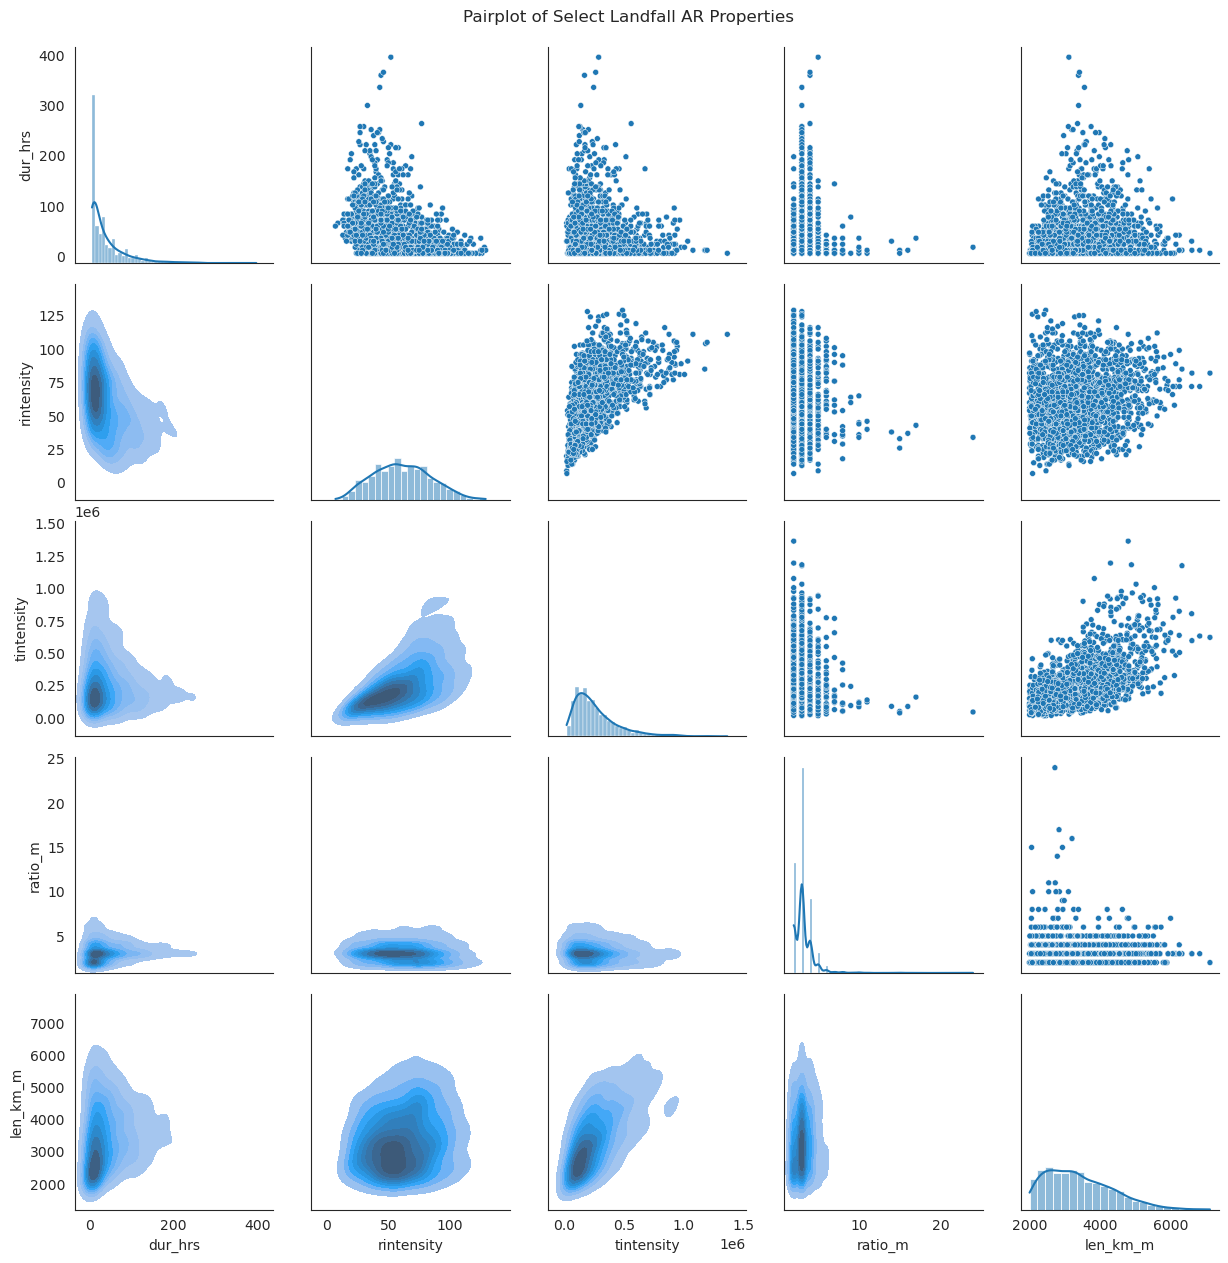

In [42]:
sub = gdf[['dur_hrs', 'rintensity', 'tintensity', 'ratio_m', 'len_km_m']]
sns.set_style("white")

g = sns.PairGrid(sub)
g.map_upper(sns.scatterplot, size=0.1)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

g.fig.suptitle('Pairplot of Select Landfall AR Properties', y=1.01)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, '1'),
  Text(0, 1.5, '2'),
  Text(0, 2.5, '3'),
  Text(0, 3.5, '4'),
  Text(0, 4.5, '5'),
  Text(0, 5.5, '6'),
  Text(0, 6.5, '7'),
  Text(0, 7.5, '8'),
  Text(0, 8.5, '9'),
  Text(0, 9.5, '10'),
  Text(0, 10.5, '11'),
  Text(0, 11.5, '12')])

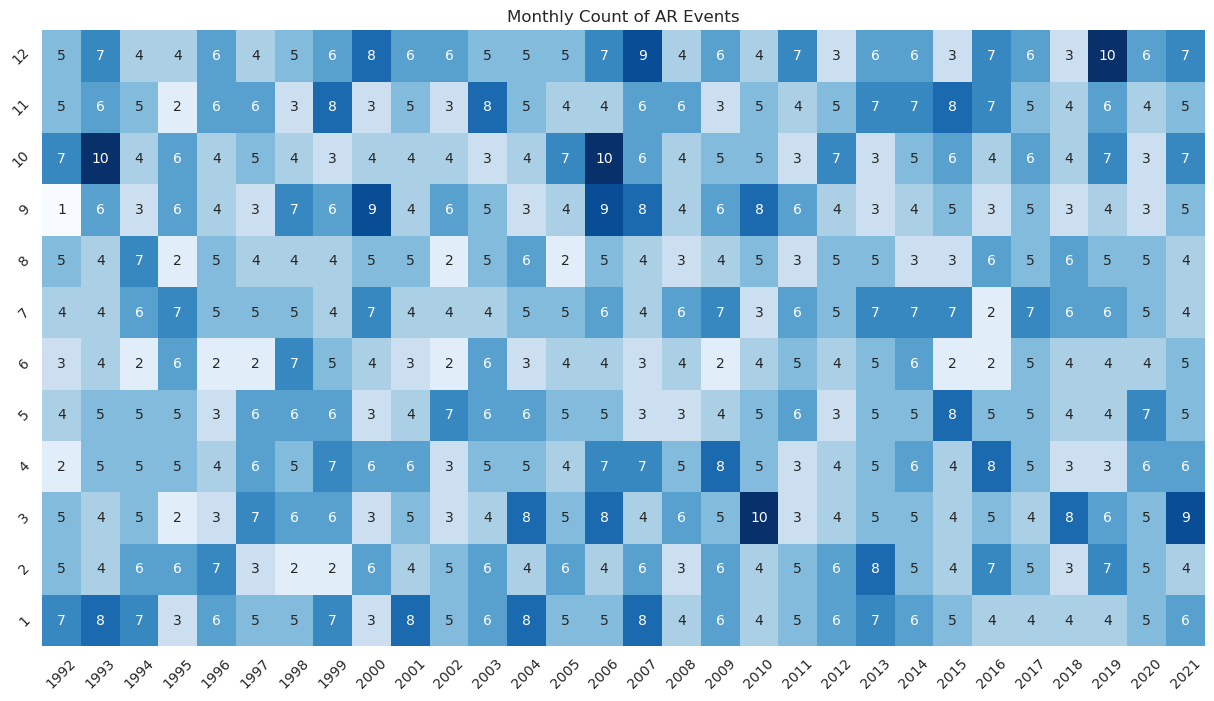

In [34]:
gdf["Year"] = gdf.start.apply(lambda x: x.year)
gdf["Month"] = gdf.end.apply(lambda x: x.month)
pt = gdf.pivot_table(index="Month",columns="Year",values="index", aggfunc="count").fillna(0)

fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(pt, annot=True, ax=ax, cmap='Blues', cbar=False)

ax.invert_yaxis()
ax.set_title('Monthly Count of AR Events')
ax.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [27]:
gdf['rintensity_dev'] = gdf['rintensity'] - gdf['rintensity'].mean()
gdf['rintensity_dev']

0       16.664817
1      -12.335183
2       18.664817
3      -28.335183
4      -32.335183
          ...    
1797   -36.335183
1798    29.664817
1799     4.664817
1800    15.664817
1801   -10.335183
Name: rintensity_dev, Length: 1802, dtype: float64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, '1'),
  Text(0, 1.5, '2'),
  Text(0, 2.5, '3'),
  Text(0, 3.5, '4'),
  Text(0, 4.5, '5'),
  Text(0, 5.5, '6'),
  Text(0, 6.5, '7'),
  Text(0, 7.5, '8'),
  Text(0, 8.5, '9'),
  Text(0, 9.5, '10'),
  Text(0, 10.5, '11'),
  Text(0, 11.5, '12')])

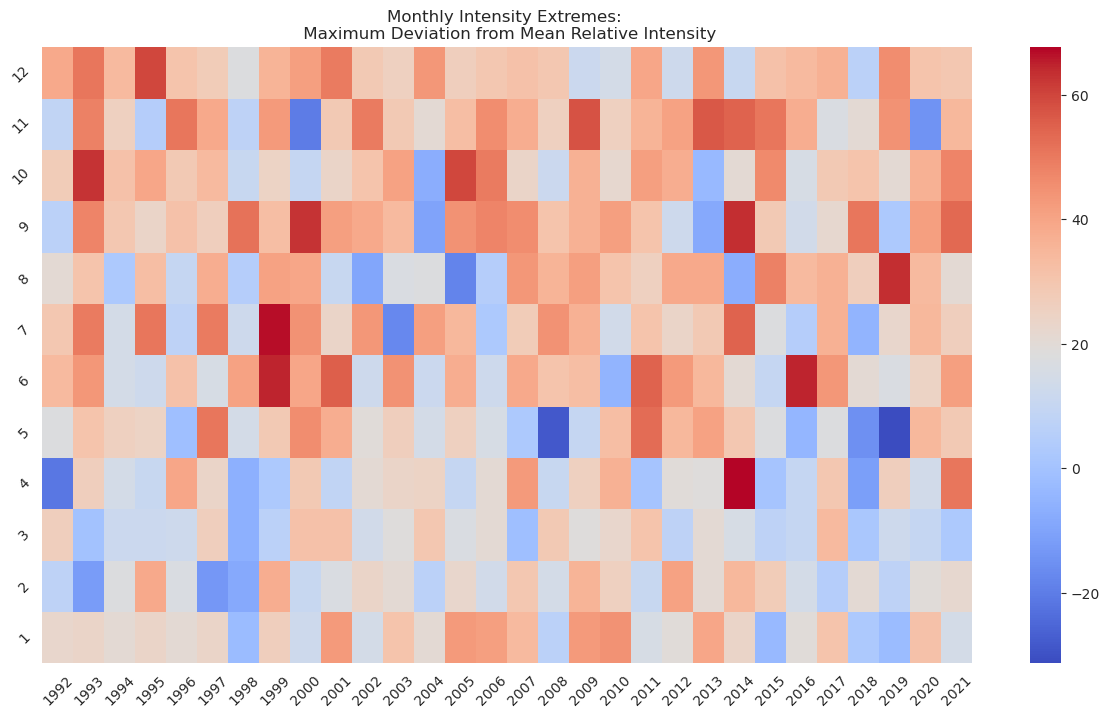

In [33]:
gdf["Year"] = gdf.start.apply(lambda x: x.year)
gdf["Month"] = gdf.start.apply(lambda x: x.month)
pt = gdf.pivot_table(index="Month",columns="Year",values="rintensity_dev", aggfunc="max").fillna(0)

fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(pt, annot=False, ax=ax, cmap='coolwarm')

ax.invert_yaxis()
ax.set_title('Monthly Intensity Extremes: \n Maximum Deviation from Mean Relative Intensity')
ax.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, '1'),
  Text(0, 1.5, '2'),
  Text(0, 2.5, '3'),
  Text(0, 3.5, '4'),
  Text(0, 4.5, '5'),
  Text(0, 5.5, '6'),
  Text(0, 6.5, '7'),
  Text(0, 7.5, '8'),
  Text(0, 8.5, '9'),
  Text(0, 9.5, '10'),
  Text(0, 10.5, '11'),
  Text(0, 11.5, '12')])

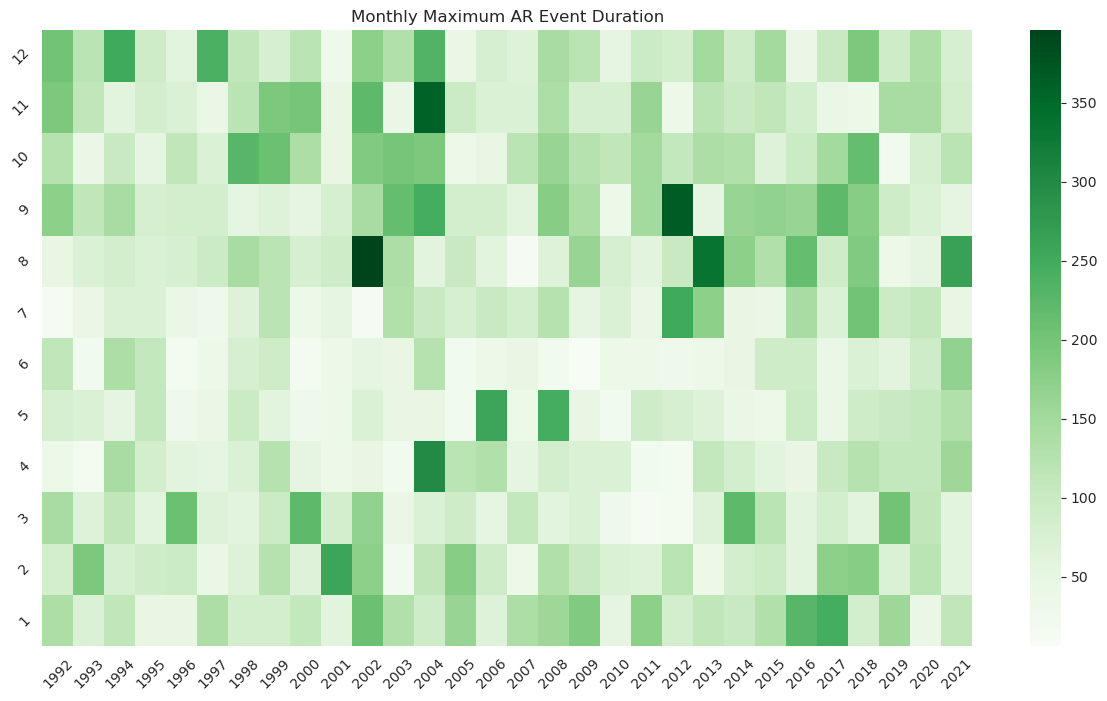

In [35]:
gdf["Year"] = gdf.start.apply(lambda x: x.year)
gdf["Month"] = gdf.start.apply(lambda x: x.month)
pt = gdf.pivot_table(index="Month",columns="Year",values="dur_hrs", aggfunc="max").fillna(0)

fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(pt, annot=False, ax=ax, cmap='Greens')

ax.invert_yaxis()
ax.set_title('Monthly Maximum AR Event Duration')
ax.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [87]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.crs

world_albers = world.to_crs('EPSG:9822')


/tmp/ipykernel_13230/3673489188.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'Albers Equal Area Conic')

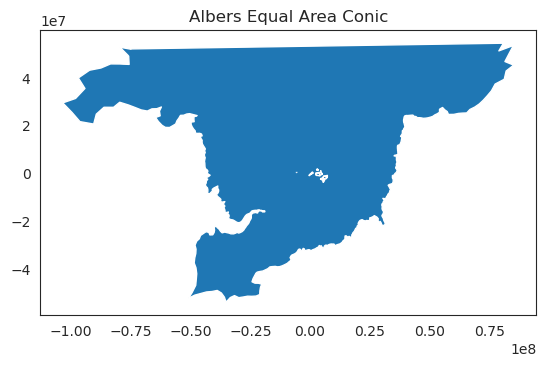

In [88]:
ax = world_albers.plot()
ax.set_title("Albers Equal Area Conic")